# Importing Libraries and CSV Data

In [88]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

%matplotlib inline

In [89]:
jan_2018 = pd.read_csv('On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_1.csv', dtype = 'unicode')

In [90]:
feb_2018 = pd.read_csv('On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_2.csv', dtype = 'unicode')

In [91]:
mar_2018 = pd.read_csv('On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_3.csv', dtype = 'unicode')

In [92]:
jul_2018 = pd.read_csv('On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_7.csv', dtype = 'unicode')

In [93]:
aug_2018 = pd.read_csv('On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_8.csv', dtype = 'unicode')

In [94]:
sep_2018 = pd.read_csv('On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv', dtype = 'unicode')

In [95]:
df = pd.concat([jan_2018, feb_2018, mar_2018, jul_2018, aug_2018, sep_2018])

In [96]:
df_winter2018 = pd.concat([jan_2018, feb_2018, mar_2018])

In [97]:
df_summer2018 = pd.concat([jul_2018, aug_2018, sep_2018])

# Optimising data

In [98]:
# Fill NaN value with 0

df['DepDelayMinutes'] = df['DepDelayMinutes'].fillna(0)
df['ArrDelayMinutes'] = df['ArrDelayMinutes'].fillna(0)
df['WeatherDelay'] = df['WeatherDelay'].fillna(0)
df_winter2018['WeatherDelay'] = df_winter2018['WeatherDelay'].fillna(0)
df_summer2018['WeatherDelay'] = df_summer2018['WeatherDelay'].fillna(0)

In [99]:
#convert just column 'Departure Delay Minutes' to numeric

df['ArrDelayMinutes'] = pd.to_numeric(df['ArrDelayMinutes'])
df['DepDelayMinutes'] = pd.to_numeric(df['DepDelayMinutes'])
df['WeatherDelay'] = pd.to_numeric(df['WeatherDelay'])
df['NASDelay'] = pd.to_numeric(df['NASDelay'])
df['SecurityDelay'] = pd.to_numeric(df['SecurityDelay'])
df['LateAircraftDelay'] = pd.to_numeric(df['LateAircraftDelay'])
df['CarrierDelay'] = pd.to_numeric(df['CarrierDelay'])
df['DepTime'] = pd.to_numeric(df['DepTime'])
df['CRSDepTime'] = pd.to_numeric(df['CRSDepTime'])
df['TaxiOut'] = pd.to_numeric(df['TaxiOut'])
df['TaxiIn'] = pd.to_numeric(df['TaxiIn'])
df_winter2018['TaxiOut'] = pd.to_numeric(df_winter2018['TaxiOut'])
df_winter2018['TaxiIn'] = pd.to_numeric(df_winter2018['TaxiIn'])
df_summer2018['TaxiOut'] = pd.to_numeric(df_summer2018['TaxiOut'])
df_summer2018['TaxiIn'] = pd.to_numeric(df_summer2018['TaxiIn'])
df_winter2018['WeatherDelay'] = pd.to_numeric(df_winter2018['WeatherDelay'])
df_summer2018['WeatherDelay'] = pd.to_numeric(df_summer2018['WeatherDelay'])

# Overview of Delays

### Flight Results

Per BITRE Definition of On Time Performance: https://www.bitre.gov.au/statistics/aviation/otphome#:~:text=Definitions,flights%20count%20as%20on%20time.

Delay / Cancelled groups have been divided into 3 categories, "On Time / Early" (up to 15 minutes), "Delayed" (above 15 minutes delay), and "Cancelled" (Cancelled flights).

In [100]:
df['DelayGroup'] = None
df.loc[
    (df['DepDelayMinutes'] <= 15), 'DelayGroup'
] = 'On Time / Early'
df.loc[df['DepDelayMinutes'] > 15, 'DelayGroup'] = 'Delayed'
df.loc[(df['CancellationCode'] == 'B') & (df['DepDelayMinutes'] == 0), 'DelayGroup'] = 'Cancelled'

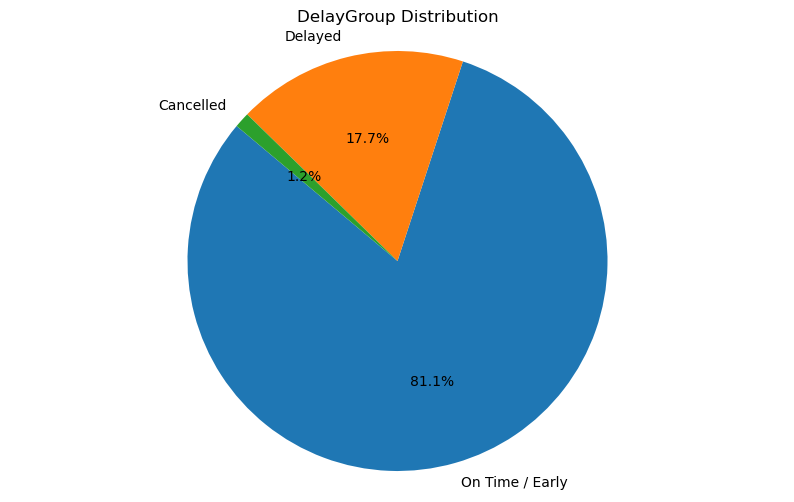

In [101]:
# Putting it into a pie chart
delay_group_counts = df['DelayGroup'].value_counts()

# Calculate the percentage for each DelayGroup
total_count = len(df)
delay_group_percentages = (delay_group_counts / total_count) * 100

# Create a pie chart
plt.figure(figsize = (10, 6))
plt.pie(delay_group_percentages, 
        labels = delay_group_percentages.index, 
        startangle = 140,
        autopct = '%1.1f%%'
        )

plt.title('DelayGroup Distribution')
plt.axis('equal')

plt.savefig('flight_result_%.png', dpi = 300)

### Delay distribution

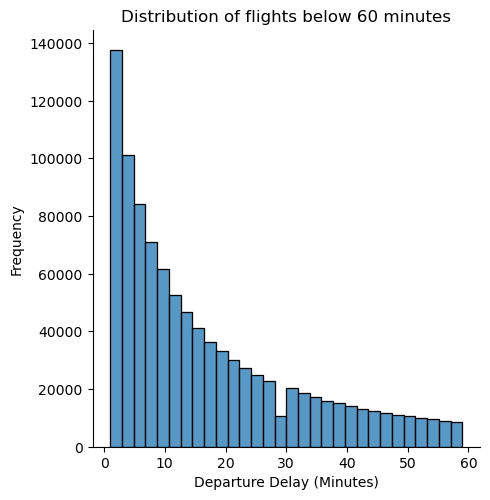

In [102]:
Delay_Range = df.query('DepDelayMinutes > 0 and DepDelayMinutes < 60')['DepDelayMinutes']

Distribution = sns.displot(Delay_Range, bins = 30).set(title = 'Distribution of flights below 60 minutes', 
                                        xlabel = 'Departure Delay (Minutes)', 
                                        ylabel = 'Frequency')
                                       
Distribution.fig.subplots_adjust(top=.95)

plt.savefig('Distribution.png', format="png", dpi = 300)

# Exploring Delay by Airline

### Delay by Carrier

In [103]:
#Finding Delay by Carrier

# Filter the DataFrame for 'DepDelayMinutes' > 0
filtered_departure_delay = df[df['DepDelayMinutes'] > 0]

# Group by 'Reporting_Airline' and calculate the mean for 'DepDelayMinutes'
airline_departureDelays = filtered_departure_delay.groupby('Reporting_Airline')['DepDelayMinutes'].mean()

airline_departureDelays = airline_departureDelays.sort_values(ascending=False)

airline_departureDelays_df = pd.DataFrame({'MeanDepDelayMinutes': airline_departureDelays})

print(airline_departureDelays_df)

                   MeanDepDelayMinutes
Reporting_Airline                     
EV                           61.825525
9E                           57.041478
OO                           55.525472
YV                           52.106236
F9                           51.835361
NK                           50.001595
G4                           48.903714
B6                           48.703688
YX                           47.724321
UA                           46.487795
OH                           40.668143
MQ                           39.355355
AA                           38.268114
DL                           35.337529
VX                           34.926979
AS                           28.792584
WN                           25.408099
HA                           20.183608


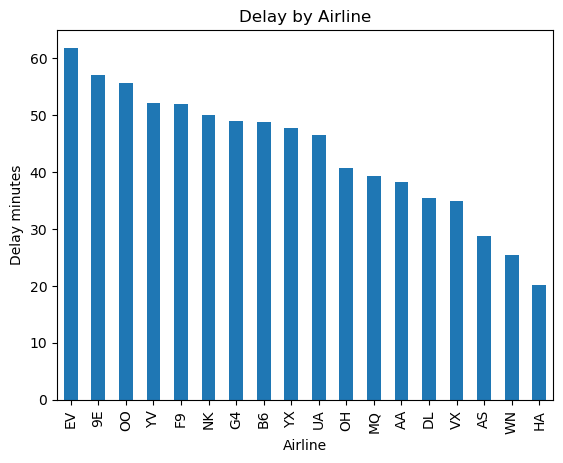

In [104]:
airline_departureDelays.plot(kind = 'bar', title = 'Delay by Airline', xlabel = 'Airline', ylabel = 'Delay minutes')
plt.savefig('Carrier.png', format="png", dpi = 300)

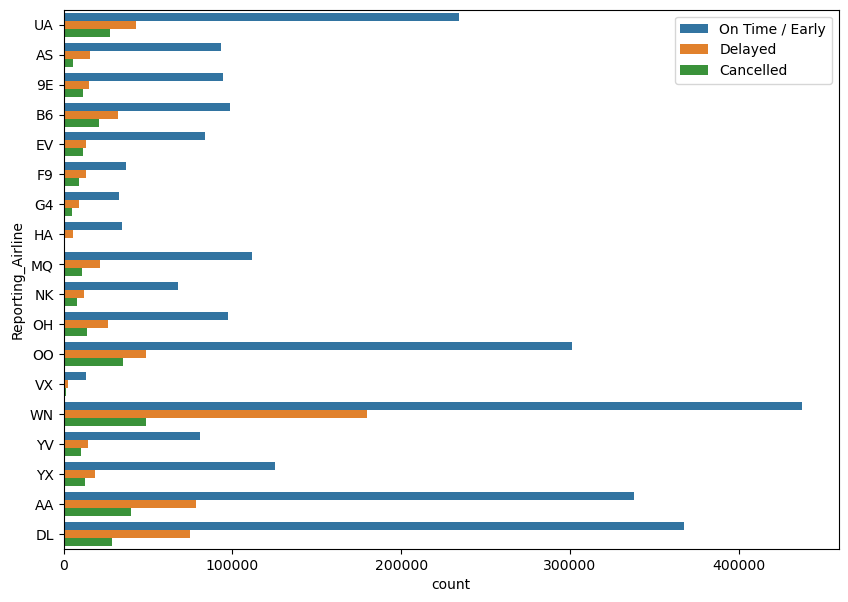

In [105]:
#Further breakdown of delay by airline
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df['DelayGroup'] = df['DepDelayMinutes'].apply(delay_type)

fig = plt.figure(1, figsize = (10,7))
ax = sns.countplot(y = "Reporting_Airline", hue = 'DelayGroup', data = df)

L = plt.legend()
L.get_texts()[0].set_text('On Time / Early')
L.get_texts()[1].set_text('Delayed')
L.get_texts()[2].set_text('Cancelled')
plt.savefig('Carrier_Breakdown.png', format="png", dpi = 300)

### Airline delays: Take-off and Landing

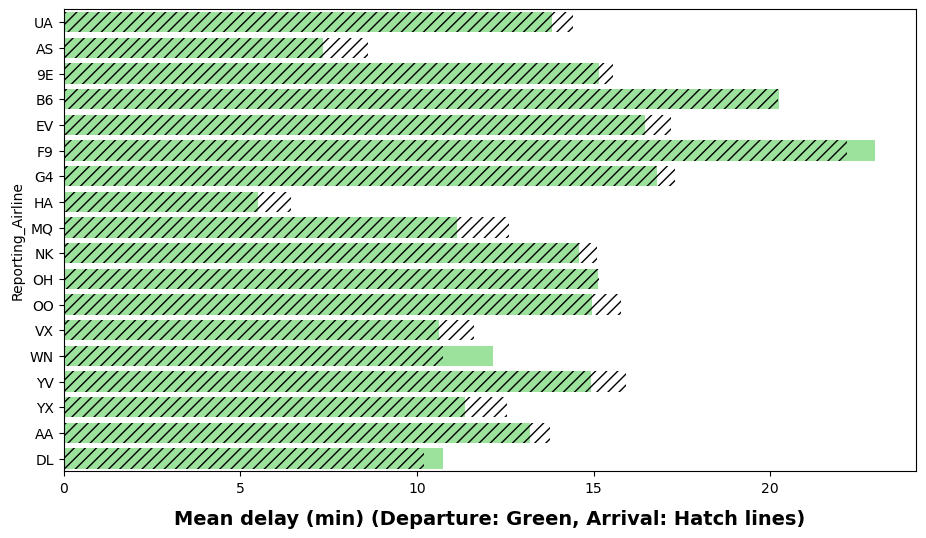

In [172]:
fig = plt.figure(1, figsize = (11, 6))
ax = sns.barplot(x = "DepDelayMinutes", y = "Reporting_Airline", data = df, color = "lightgreen", errorbar = None)
ax = sns.barplot(x = "ArrDelayMinutes", y = "Reporting_Airline", data = df, color = "r", hatch = '///', alpha = 0.0, errorbar = None)

plt.xlabel('Mean delay (min) (Departure: Green, Arrival: Hatch lines)', fontsize = 14, weight = 'bold', labelpad = 10)
plt.savefig('DepArrDelay.png', format = "png", dpi = 300)


### WN (Southwest) Delay

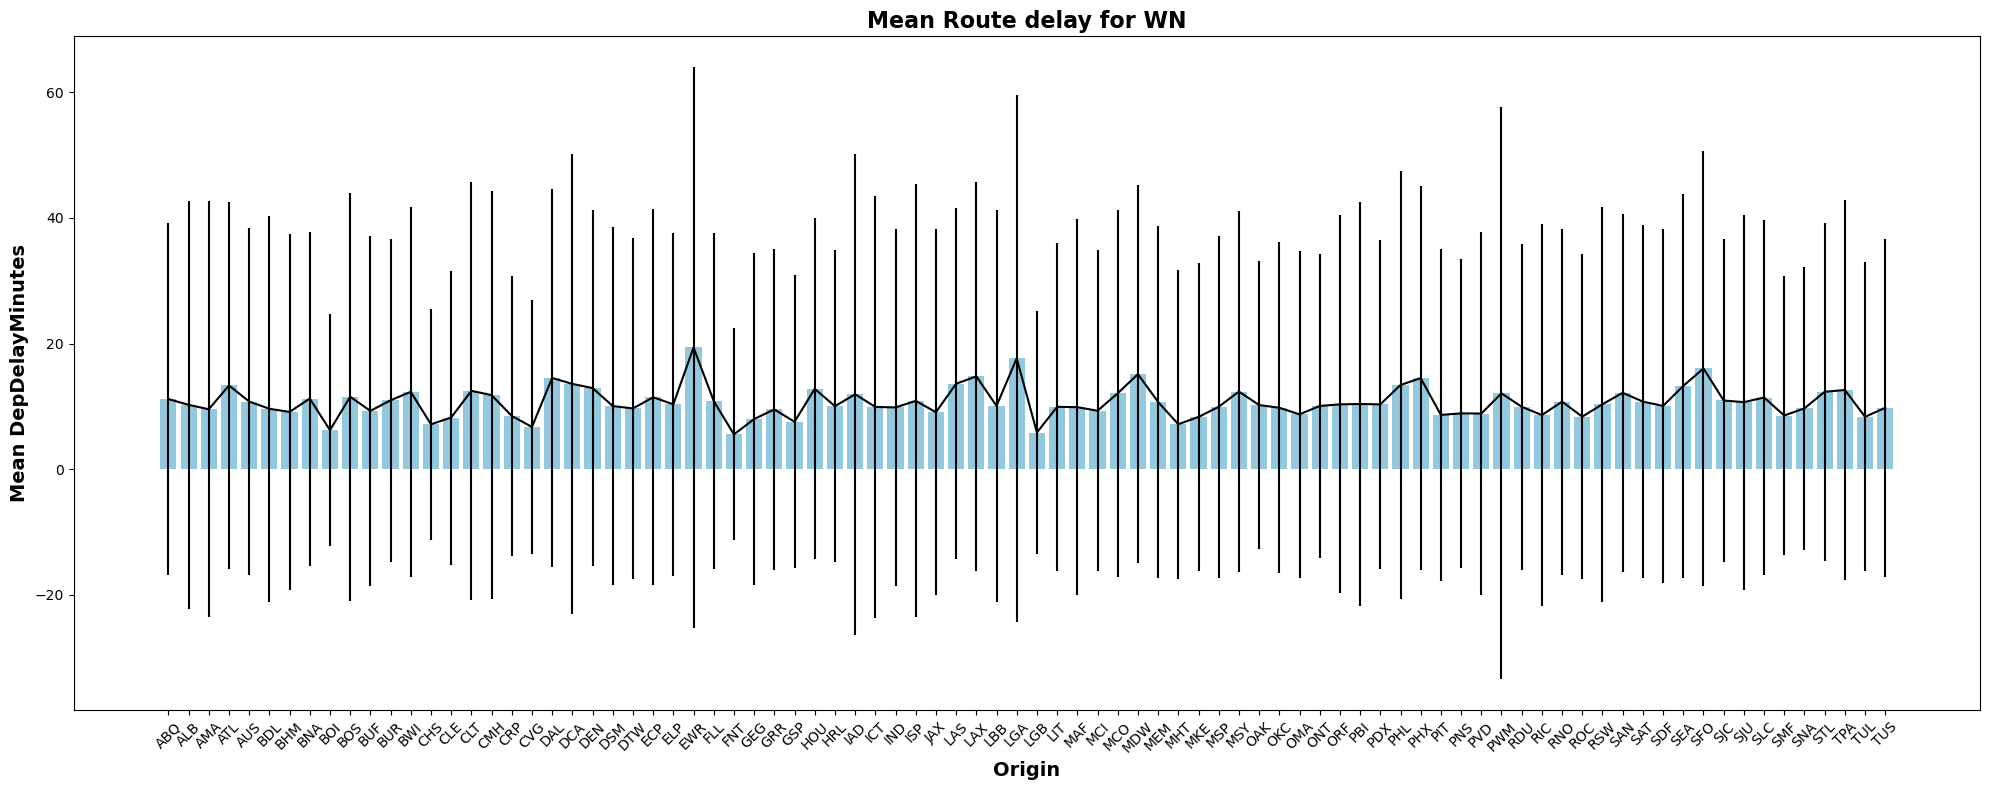

In [173]:
wn_df = df[df['Reporting_Airline'] == 'WN']

# Calculate the mean DepDelayMinutes for each origin
mean_delay_per_origin = wn_df.groupby('Origin')['DepDelayMinutes'].mean().reset_index()

# Calculate the standard deviation of DepDelayMinutes for each origin
std_delay_per_origin = wn_df.groupby('Origin')['DepDelayMinutes'].std().reset_index()

# Plotting the error bar chart
plt.figure(figsize = (20, 8))
ax = sns.barplot(x = 'Origin', y = 'DepDelayMinutes', 
                 data = mean_delay_per_origin, 
                 color = 'skyblue', 
                 errorbar = 'sd')

plt.errorbar(mean_delay_per_origin['Origin'], 
             mean_delay_per_origin['DepDelayMinutes'],
             yerr = std_delay_per_origin['DepDelayMinutes'], 
             color = 'black')

plt.xlabel('Origin', fontsize=14, weight='bold')
plt.ylabel('Mean DepDelayMinutes', fontsize=14, weight='bold')
plt.title('Mean Route delay for WN', fontsize=16, weight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('WNDelay.png', format = "png", dpi = 300)


### Departure time

Grouping the departure time into 3 stages of the day, Morning (0600 - 1159), Afternoon (1200 - 1759), Evening (1800 - 1159) & Night (0000 - 0559) 

In [107]:
#Grouping departure time

df['DepGroup'] = None
df.loc[
    (df['CRSDepTime'] > 559) & (df['CRSDepTime'] <= 1159), 'DepGroup'
] = 'Morning'
df.loc[
    (df['CRSDepTime'] > 1159) & (df['CRSDepTime'] <= 1759), 'DepGroup'
] = 'Afternoon'
df.loc[
    (df['CRSDepTime'] > 1759) & (df['CRSDepTime'] <= 2359), 'DepGroup'
] = 'Evening'
df.loc[
    (df['CRSDepTime'] > 0) & (df['CRSDepTime'] <= 559), 'DepGroup'
] = 'Night'
df.loc[df['CancellationCode'] == 'B', 'DepGroup'] = 'Cancelled'

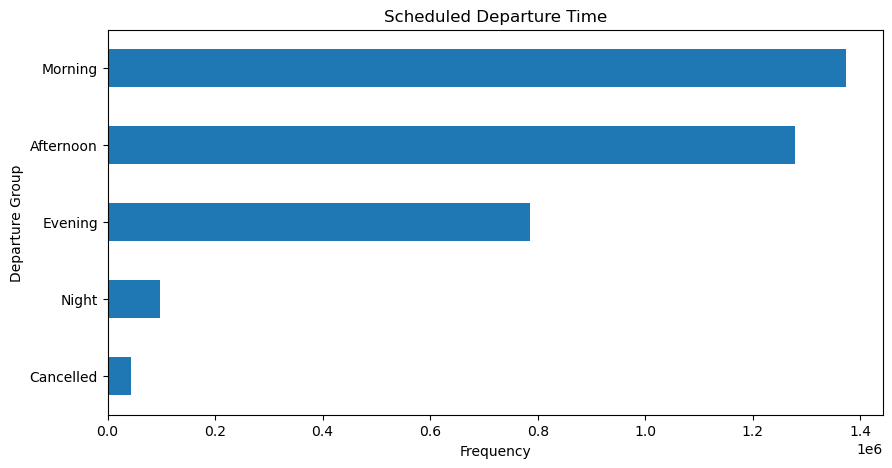

In [108]:
df['DepGroup'].value_counts(ascending = True).plot(
    kind = 'barh', figsize = (10, 5), title = 'Scheduled Departure Time', xlabel = 'Frequency', ylabel = 'Departure Group'
)

plt.savefig('CRSDepTime.png', format="png", dpi = 300)

### Departure Block Time

In [109]:
delayed_flight = df[df['DepDelayMinutes'] > 0]

# Group by 'DepTimeBlk' and calculate the mean 'DepDelayMinutes' for values greater than 0
mean_dep_delay_by_time_blk = delayed_flight.groupby('DepTimeBlk')['DepDelayMinutes'].mean()

print(mean_dep_delay_by_time_blk)

DepTimeBlk
0001-0559    39.744999
0600-0659    38.916185
0700-0759    35.964392
0800-0859    34.920091
0900-0959    32.013586
1000-1059    32.575073
1100-1159    34.191996
1200-1259    36.262248
1300-1359    35.389563
1400-1459    37.852491
1500-1559    39.753553
1600-1659    40.979727
1700-1759    44.400936
1800-1859    45.823579
1900-1959    44.830756
2000-2059    45.173755
2100-2159    42.080137
2200-2259    40.232083
2300-2359    36.215643
Name: DepDelayMinutes, dtype: float64


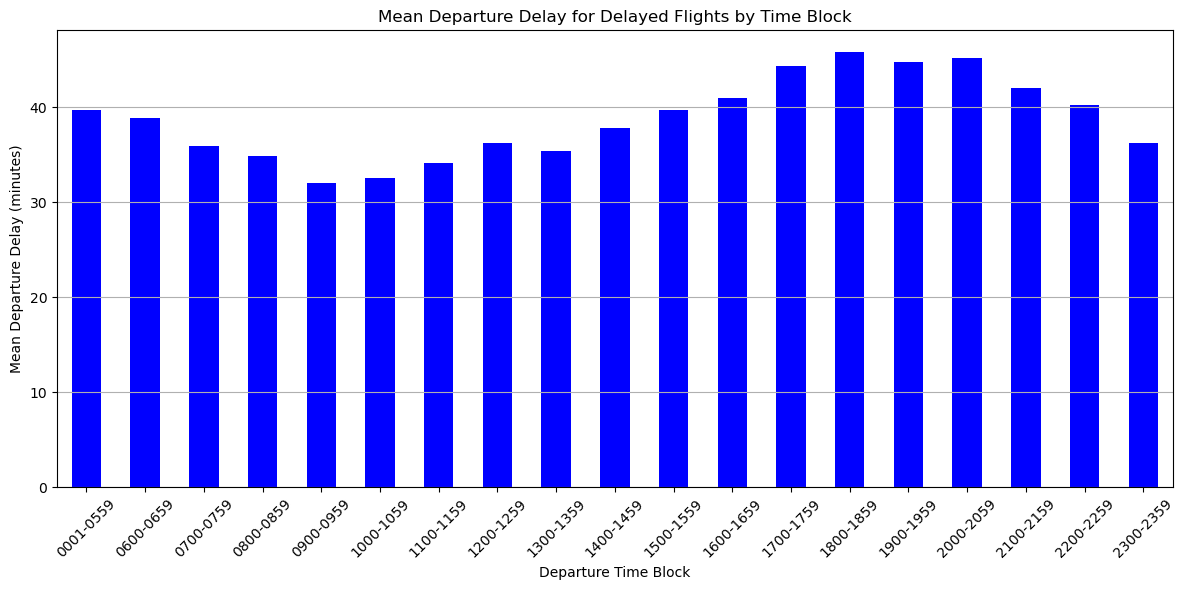

In [110]:
plt.figure(figsize=(12, 6))
mean_dep_delay_by_time_blk.plot(kind = 'bar', 
                                color = 'blue',
                                xlabel = 'Departure Time Block', 
                                ylabel = 'Mean Departure Delay (minutes)',
                                title = 'Mean Departure Delay for Delayed Flights by Time Block'
                                )
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('DepBlock.png', format="png", dpi = 300)

### Day of Week Delay

In [111]:
day_delay_flight = df[df['DepDelayMinutes'] > 0]

# Group by 'DayOfWeek' and calculate the mean 'DepDelayMinutes'
mean_dep_delay_by_day = day_delay_flight.groupby('DayOfWeek')['DepDelayMinutes'].mean()

print(mean_dep_delay_by_day)

DayOfWeek
1    40.592290
2    42.053192
3    38.278800
4    38.174786
5    40.730389
6    35.876314
7    38.441802
Name: DepDelayMinutes, dtype: float64


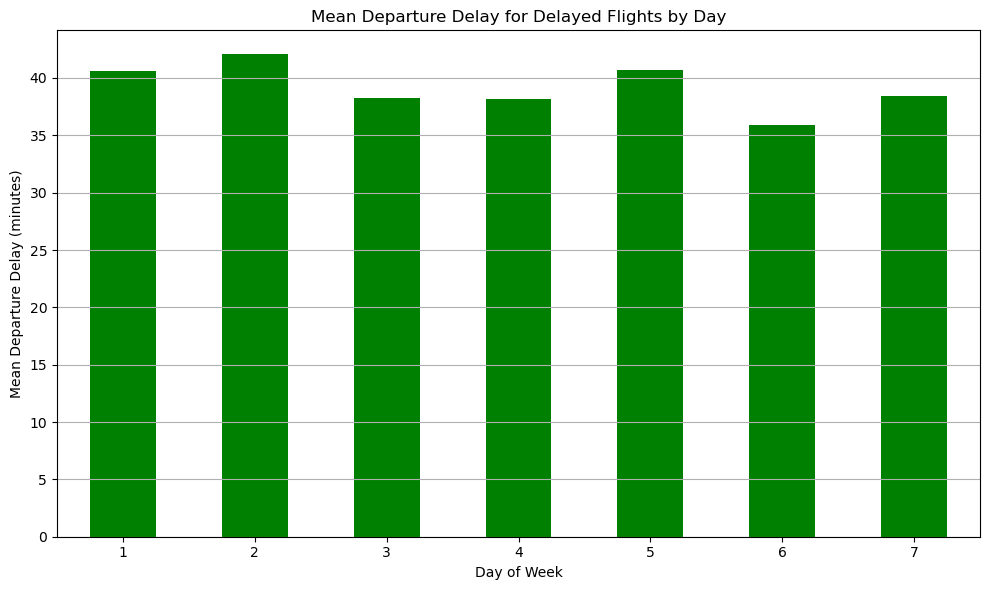

In [112]:
mean_dep_delay_by_day = day_delay_flight.groupby('DayOfWeek')['DepDelayMinutes'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
mean_dep_delay_by_day.plot(kind = 'bar', 
                           color = 'green',
                           xlabel = 'Day of Week',
                           ylabel = 'Mean Departure Delay (minutes)',
                           title = 'Mean Departure Delay for Delayed Flights by Day'
                           )

plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('DelayDay.png', format="png", dpi = 300)

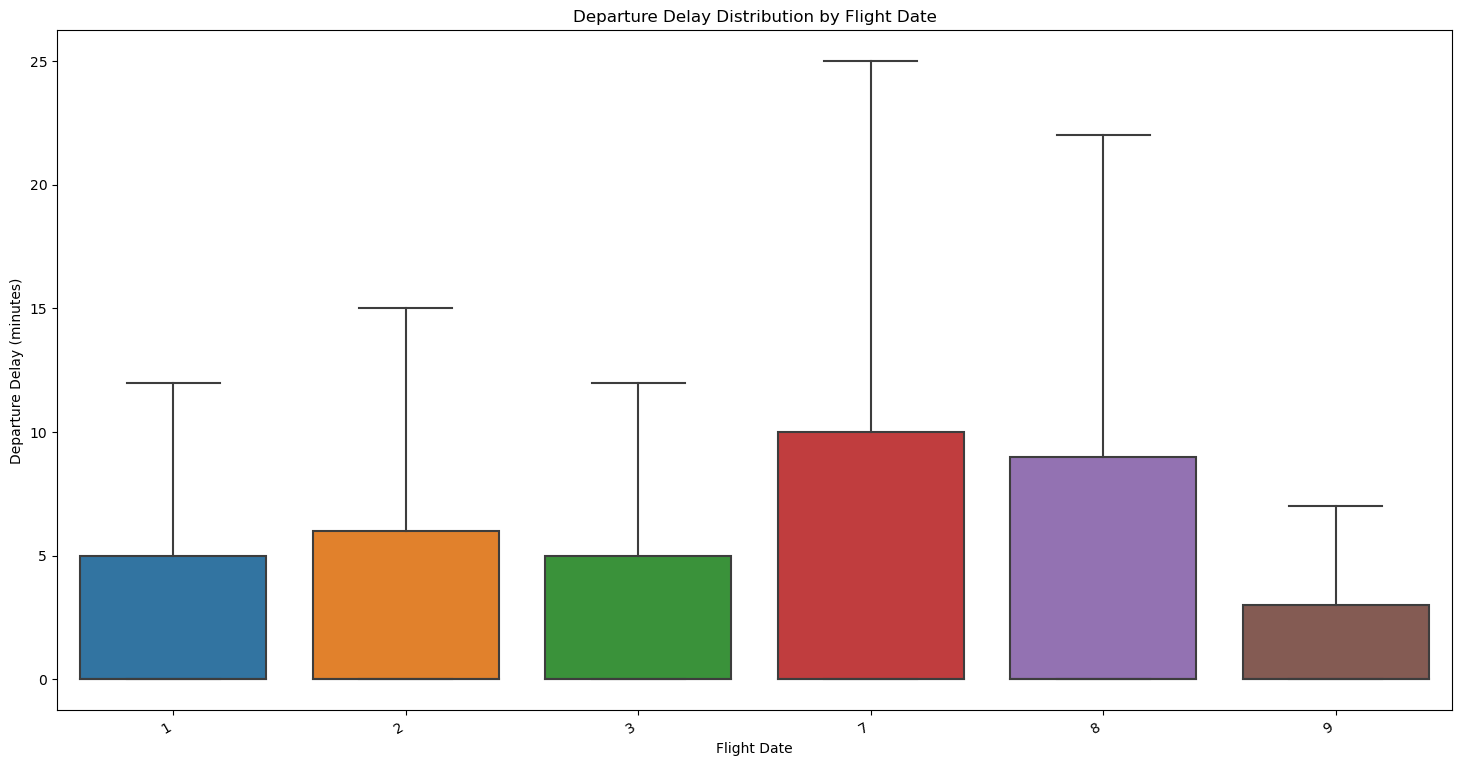

In [113]:
# Create a box plot
fig, ax = plt.subplots(figsize=(18, 10))
sns.boxplot(x=df['Month'], y=df['DepDelayMinutes'], ax=ax, showfliers=False)
fig.autofmt_xdate()

plt.xlabel('Flight Date')
plt.ylabel('Departure Delay (minutes)')
plt.title('Departure Delay Distribution by Flight Date')

plt.savefig('BoxDelayMonth.png', format="png", dpi = 300)


### Departure delay by departure group

In [114]:
departure_group = df.groupby(df.DepGroup)
departure_group = pd.DataFrame(departure_group['DepDelayMinutes'].mean()).sort_values('DepDelayMinutes', ascending=False)

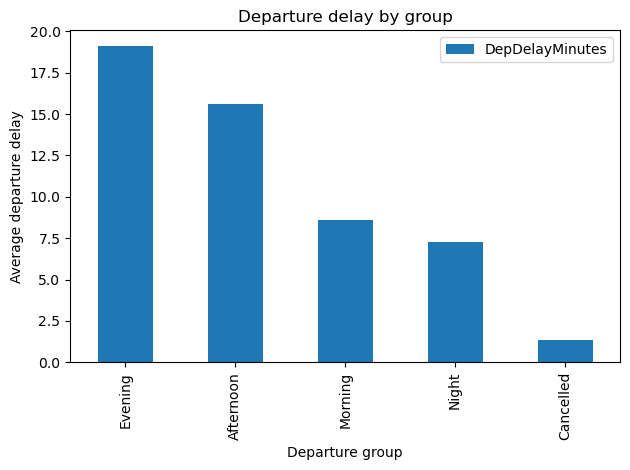

In [115]:
departure_group.plot(kind = 'bar',
                     title = 'Departure delay by group',
                     ylabel = 'Average departure delay',
                     xlabel = 'Departure group')
plt.tight_layout()
plt.savefig('DepDelayGroup.png', format="png", dpi = 300)

In [116]:
print('The highest delay departure group is: ' + departure_group.index[0])

The highest delay departure group is: Evening


In [117]:
# Finding mean delay by reason

mean_delays = {
    'Mean Late Aircraft Delay': [df['LateAircraftDelay'].mean()],
    'Mean NAS Delay': [df['NASDelay'].mean()],
    'Mean Security Delay': [df['SecurityDelay'].mean()],
    'Mean Weather Delay': [df['WeatherDelay'].mean()],
    'Mean Carrier Delay': [df['CarrierDelay'].mean()]
}

delay_df = pd.DataFrame(mean_delays)
delay_df

,Mean Late Aircraft Delay,Mean NAS Delay,Mean Security Delay,Mean Weather Delay,Mean Carrier Delay
0,26.002072,16.232403,0.105993,0.743961,19.650222


In [118]:
# Filter the DataFrame for 'Delays' > 0
filtered_weather_delay = df[df['WeatherDelay'] > 0]
filtered_NAS_delay = df[df['NASDelay'] > 0]
filtered_security_delay = df[df['SecurityDelay'] > 0]
filtered_carrier_delay = df[df['CarrierDelay'] > 0]
filtered_aircraft_delay = df[df['LateAircraftDelay'] > 0]

# Calculate the mean of 'Delay'
mean_weather_delay = filtered_weather_delay['WeatherDelay'].mean()
mean_NAS_delay = filtered_NAS_delay['NASDelay'].mean()
mean_security_delay = filtered_security_delay['SecurityDelay'].mean()
mean_carrier_delay = filtered_carrier_delay['CarrierDelay'].mean()
mean_aircraft_delay = filtered_aircraft_delay['LateAircraftDelay'].mean()

print(mean_weather_delay)
print(mean_NAS_delay)
print(mean_security_delay)
print(mean_carrier_delay)
print(mean_aircraft_delay)

57.731931041960316
29.949223452925597
31.443026836779588
40.59003657707224
50.48042738438682


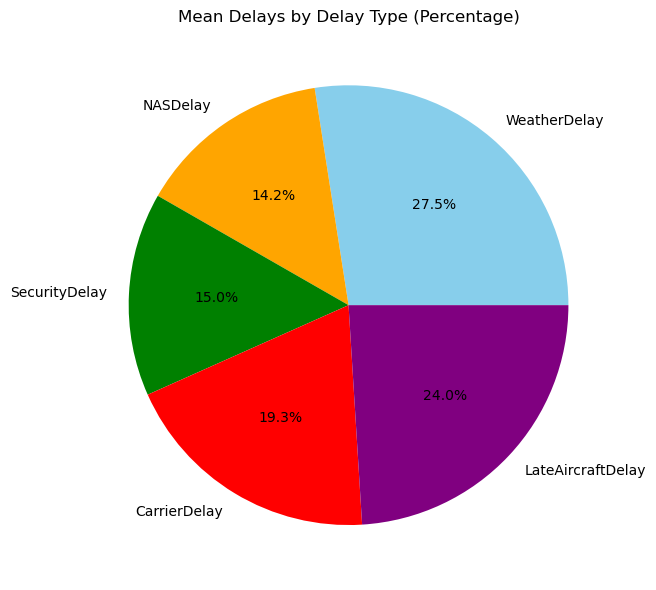

In [119]:
mean_delays = {
    'WeatherDelay': mean_weather_delay,
    'NASDelay': mean_NAS_delay,
    'SecurityDelay': mean_security_delay,
    'CarrierDelay': mean_carrier_delay,
    'LateAircraftDelay': mean_aircraft_delay
}

# Calculate the total mean delay for calculating percentages
total_mean_delay = sum(mean_delays.values())

# Calculate percentages
percentages = [(value / total_mean_delay) * 100 for value in mean_delays.values()]

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(percentages, labels=mean_delays.keys(), autopct='%1.1f%%', colors=['skyblue', 'orange', 'green', 'red', 'purple'])

plt.title('Mean Delays by Delay Type (Percentage)')

# Show the plot
plt.tight_layout()
plt.savefig('DelayReason.png', format="png", dpi = 300)

### Delay by Aircraft

In [120]:
#Finding Delay by Tail Number

tail_departureDelays = df.groupby(df.Tail_Number)

tail_departureDelays = pd.DataFrame(tail_departureDelays['DepDelayMinutes'].mean()).sort_values('DepDelayMinutes', ascending=False) #Sorting from largest to smallest
tail_departureDelays

,DepDelayMinutes
Tail_Number,
N721AN,955.000000
N2331U,296.000000
N725AN,215.500000
N732AN,198.500000
N768AA,194.285714
...,...
N29968,0.000000
N39726,0.000000
N795AN,0.000000


In [121]:
highest_delay_aircraft = tail_departureDelays.index[0]
print('Therefore, the aircraft with the highest delay is:', highest_delay_aircraft)

Therefore, the aircraft with the highest delay is: N721AN


### Finding N721AN route

In [122]:
# Making a column for "Route"

route = df['Origin'] + '-->' + df['Dest']
df['Route'] = route

In [123]:
df['Route']

0         FLL-->IAH
1         SEA-->SFO
2         DCA-->IAH
3         LAX-->ORD
4         JAX-->EWR
            ...    
585744    HOU-->CLT
585745    HOU-->CRP
585746    HOU-->CRP
585747    HOU-->CRP
585748    HOU-->CRP
Name: Route, Length: 3578557, dtype: object

In [124]:
N721AN_Route = df[df.Tail_Number == 'N721AN']

In [125]:
print('N721AN Route is: ' + N721AN_Route['Route'])

186158    N721AN Route is: DFW-->MIA
Name: Route, dtype: object


### Aircraft with > 100 flights

In [126]:
#Finding Delay by Tail Number > 100 flights

col = 'Tail_Number'
n = 100

Tail_newFiltered = df[df.groupby(col)[col].transform('count').ge(n)]

In [127]:
#Finding Delay by Tail Number > 100 flights

Tail_new = Tail_newFiltered.groupby(Tail_newFiltered.Tail_Number)

tail_above_flights = pd.DataFrame(Tail_new['DepDelayMinutes'].mean()).sort_values('DepDelayMinutes', ascending=False) #Sorting from largest to smallest
tail_above_flights

,DepDelayMinutes
Tail_Number,
N407SW,60.873786
N268SY,52.223618
N390AA,51.309524
N263SY,47.067633
N274SY,43.710345
...,...
N484HA,2.639924
N491HA,2.623225
N536AS,2.161580


In [128]:
filtered_highest_delay_aircraft = tail_above_flights.index[0]
print('Therefore, the aircraft with the highest delay is:', filtered_highest_delay_aircraft)

Therefore, the aircraft with the highest delay is: N407SW


### Finding N407SW route

In [129]:
N407SW_Route = df[df.Tail_Number == 'N407SW']

In [130]:
sorted_N407SW_Route = N407SW_Route[['Route', 'DepDelayMinutes', 'Reporting_Airline']].sort_values('DepDelayMinutes', ascending=False)

# Get the unique routes
unique_routes = sorted_N407SW_Route['Route'].nunique()

print('The number of different routes for aircraft N407SW:', unique_routes)

The number of different routes for aircraft N407SW: 36


In [131]:
N407SW_RouteDelay = print(str(N407SW_Route[['Route','DepDelayMinutes', 'Reporting_Airline']].sort_values('DepDelayMinutes', ascending=False)))

            Route  DepDelayMinutes Reporting_Airline
583058  BFL-->PHX            389.0                YV
280835  STS-->PHX            314.0                YV
162966  SBP-->PHX            296.0                YV
145622  PHX-->FAT            284.0                YV
281843  MRY-->PHX            245.0                YV
...           ...              ...               ...
161357  PHX-->MRY              0.0                YV
275765  PHX-->OAK              0.0                YV
280818  PHX-->STS              0.0                YV
390306  PHX-->STS              0.0                YV
390444  PHX-->BUR              0.0                YV

[103 rows x 3 columns]


### BFL Airport Delays

In [132]:
BFL_airport = df[(df['Origin'] == 'BFL') & (df['Tail_Number'] == 'N407SW') & (df['DepDelayMinutes'] > 0)]

In [133]:
sorted_BFL_airport = BFL_airport[['Origin', 'Tail_Number', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CarrierDelay']]

# Group BFL and calculate the mean for types of delays
BFL_departureDelays = sorted_BFL_airport.groupby('Origin').agg({
    'WeatherDelay': 'mean',
    'CarrierDelay': 'mean',
    'NASDelay': 'mean',
    'SecurityDelay': 'mean',
    'LateAircraftDelay': 'mean'
})

BFL_departureDelays

,WeatherDelay,CarrierDelay,NASDelay,SecurityDelay,LateAircraftDelay
Origin,,,,,
BFL,0.0,95.75,10.5,0.0,11.0


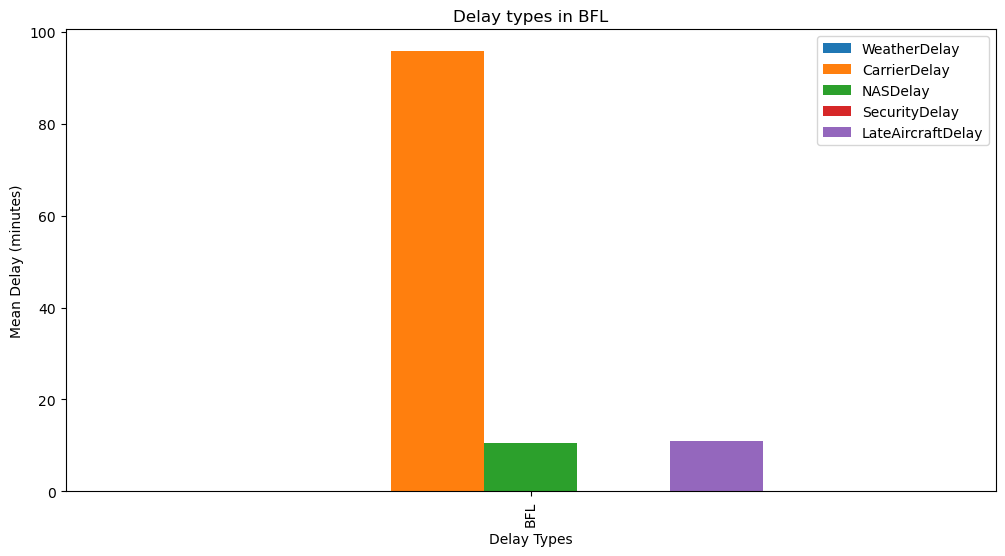

In [134]:
# Plotting the mean delays for BFL origin
BFL_departureDelays.plot(kind='bar',
                         figsize =(12, 6),
                         title = 'Delay types in BFL',
                         xlabel = 'Delay Types',
                         ylabel = 'Mean Delay (minutes)',
                         )
plt.savefig('BFLDelay.png', format="png", dpi = 300)

# Delay by Airport

### Departure delay by origin

,DepDelayMinutes
Origin,
YNG,63.000000
PPG,59.836066
MMH,44.622222
OWB,38.400000
LWB,34.087558
...,...
BET,4.174941
ITO,4.151415
BRW,3.994505


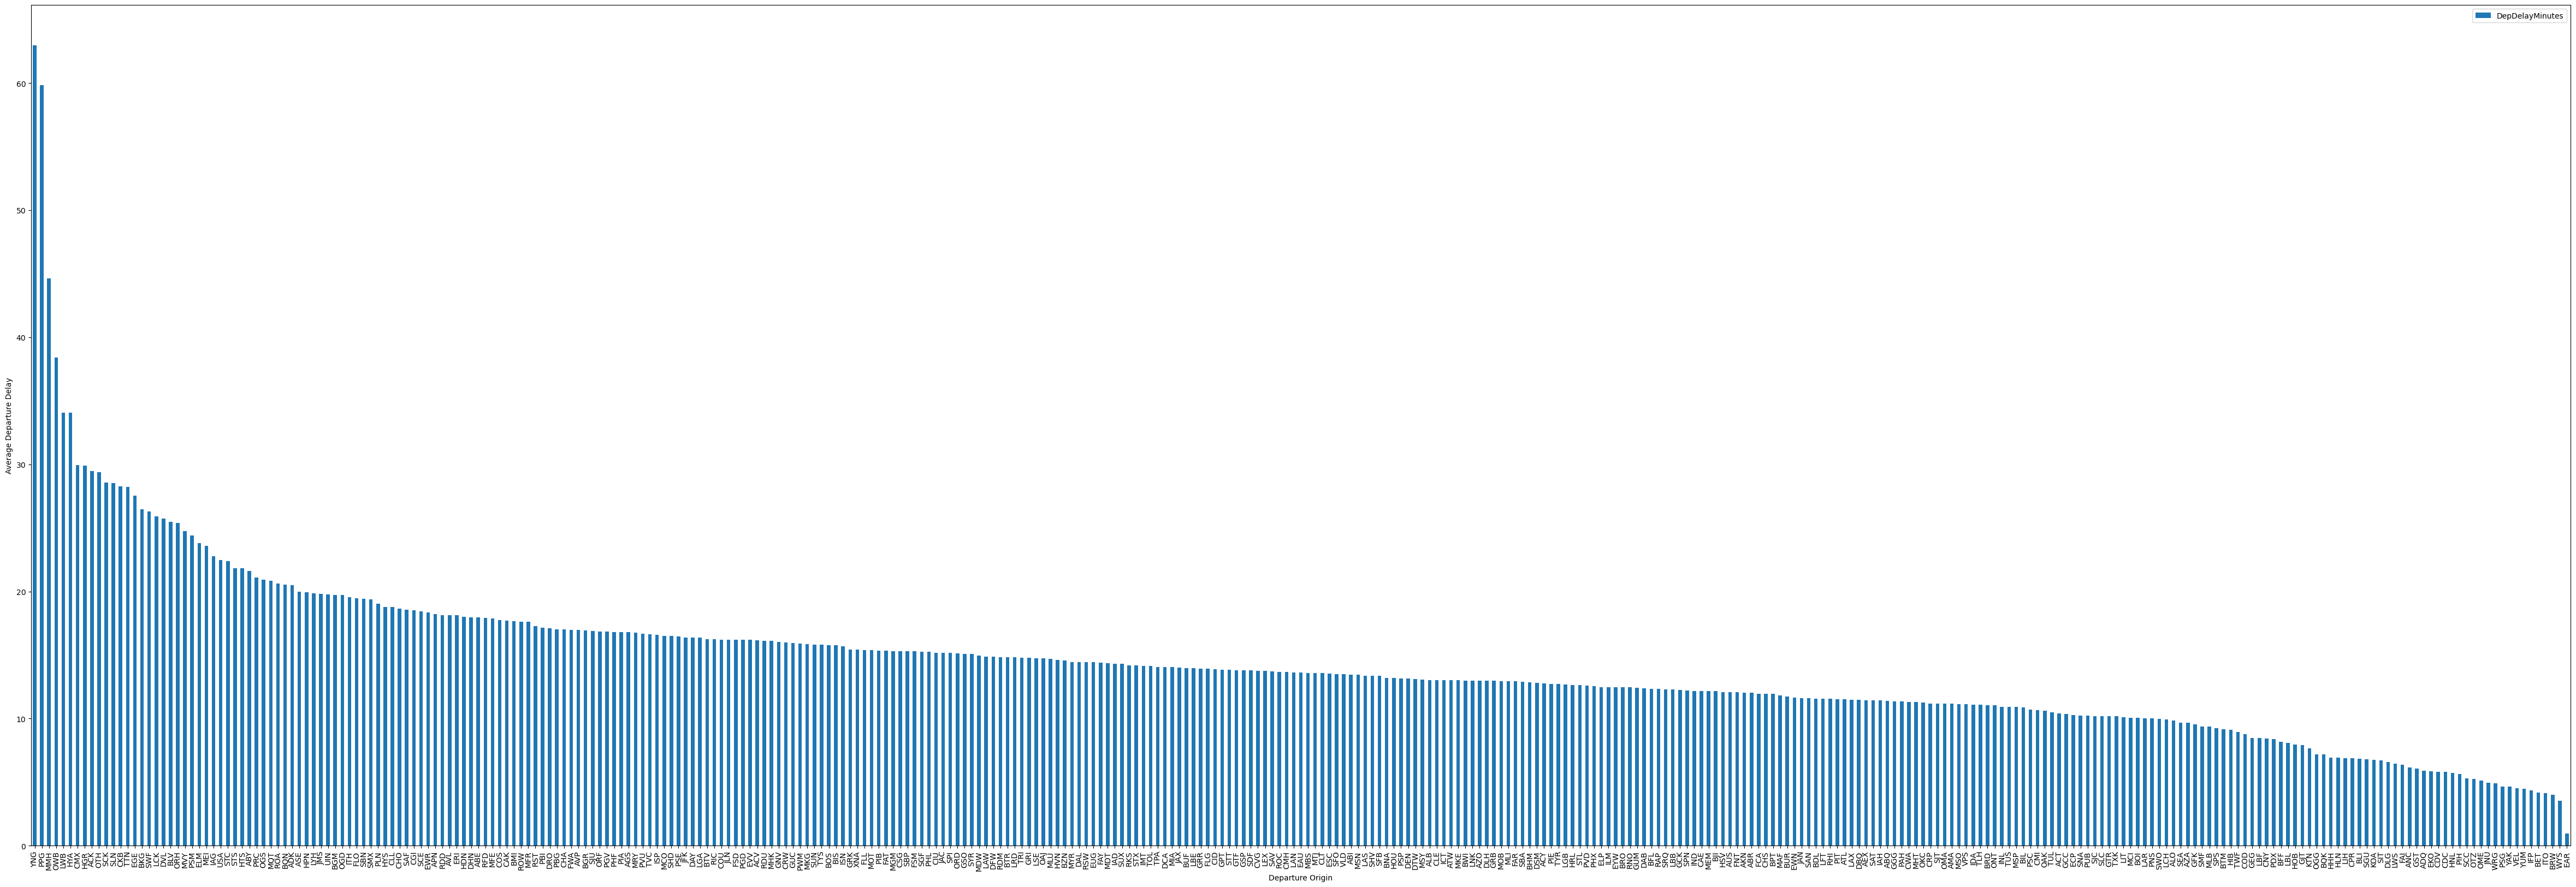

In [135]:
#Finding Delay by Airport

departure_airports = df.groupby(df.Origin)

mean_departureDelays = pd.DataFrame(departure_airports['DepDelayMinutes'].mean()).sort_values('DepDelayMinutes', ascending = False) #Sorting from largest to smallest

mean_departureDelays.plot(kind = 'bar', figsize=(60,20), xlabel = 'Departure Origin', ylabel = 'Average Departure Delay')
mean_departureDelays

### YNG Delays

In [136]:
YNG_airport = df[(df['Origin'] == 'YNG')]

In [137]:
sorted_YNG_airport = YNG_airport[['Origin', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CarrierDelay']]

# Group BFL and calculate the mean for types of delays
YNG_departureDelays = sorted_YNG_airport.groupby('Origin').agg({
    'WeatherDelay': 'mean',
    'CarrierDelay': 'mean',
    'NASDelay': 'mean',
    'SecurityDelay': 'mean',
    'LateAircraftDelay': 'mean'
})

YNG_departureDelays

,WeatherDelay,CarrierDelay,NASDelay,SecurityDelay,LateAircraftDelay
Origin,,,,,
YNG,0.0,0.0,37.0,0.0,104.0


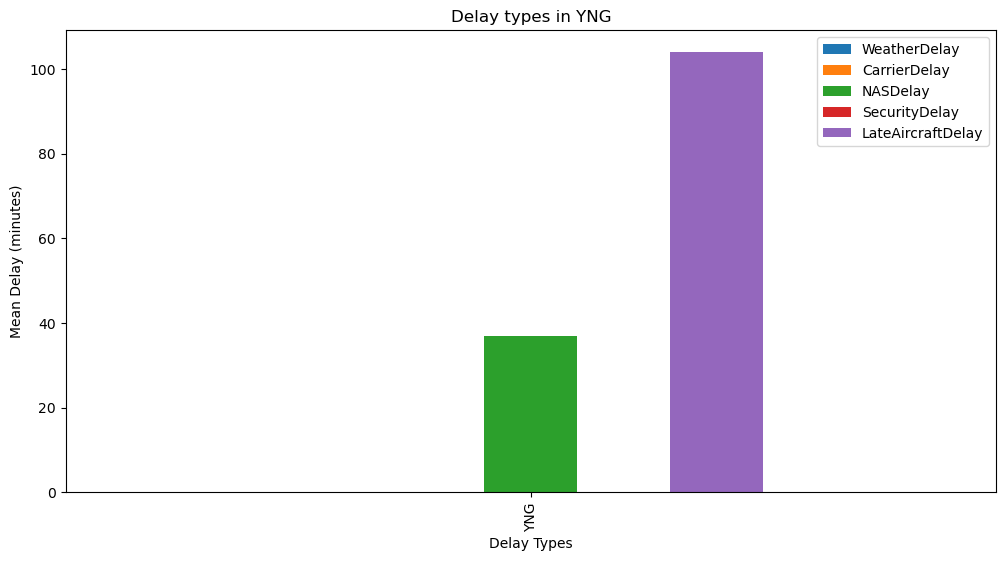

In [138]:
# Plotting the mean delays for YNG origin
YNG_departureDelays.plot(kind='bar',
                         figsize =(12, 6),
                         title = 'Delay types in YNG',
                         xlabel = 'Delay Types',
                         ylabel = 'Mean Delay (minutes)',
                         )
plt.savefig('YNGDelay.png', format="png", dpi = 300)

In [139]:
sorted_YNG_departures = YNG_airport[['Route']].value_counts()
sorted_YNG_departures

Route    
YNG-->PIE    1
YNG-->SFB    1
dtype: int64

### Airport > 100 Flights

In [140]:
#Finding Delay by Origin > 100 flights

col = 'Origin'
n = 100

Origin_newFiltered = df[df.groupby(col)[col].transform('count').ge(n)]

In [141]:
#Finding Delay by Origin Number > 100 flights

Origin_new = Origin_newFiltered.groupby(Origin_newFiltered.Origin)

origin_above_flights = pd.DataFrame(Origin_new['DepDelayMinutes'].mean()).sort_values('DepDelayMinutes', ascending=False) #Sorting from largest to smallest
origin_above_flights

,DepDelayMinutes
Origin,
LWB,34.087558
CMX,29.936464
ACK,29.489627
OTH,29.381215
SCK,28.586111
...,...
YUM,4.457478
BET,4.174941
ITO,4.151415


In [142]:
filtered_highest_delay_origin = origin_above_flights.index[0]
print('Therefore, the airport with the highest delay is:', filtered_highest_delay_origin)

Therefore, the airport with the highest delay is: LWB


### LWB Delays

In [143]:
LWB_airport = df[(df['Origin'] == 'LWB')]

In [144]:
sorted_LWB_airport = LWB_airport[['Origin', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CarrierDelay']]

# Group BFL and calculate the mean for types of delays
LWB_departureDelays = sorted_LWB_airport.groupby('Origin').agg({
    'WeatherDelay': 'mean',
    'CarrierDelay': 'mean',
    'NASDelay': 'mean',
    'SecurityDelay': 'mean',
    'LateAircraftDelay': 'mean'
})

LWB_departureDelays

,WeatherDelay,CarrierDelay,NASDelay,SecurityDelay,LateAircraftDelay
Origin,,,,,
LWB,0.235023,30.645161,17.903226,0.016129,68.822581


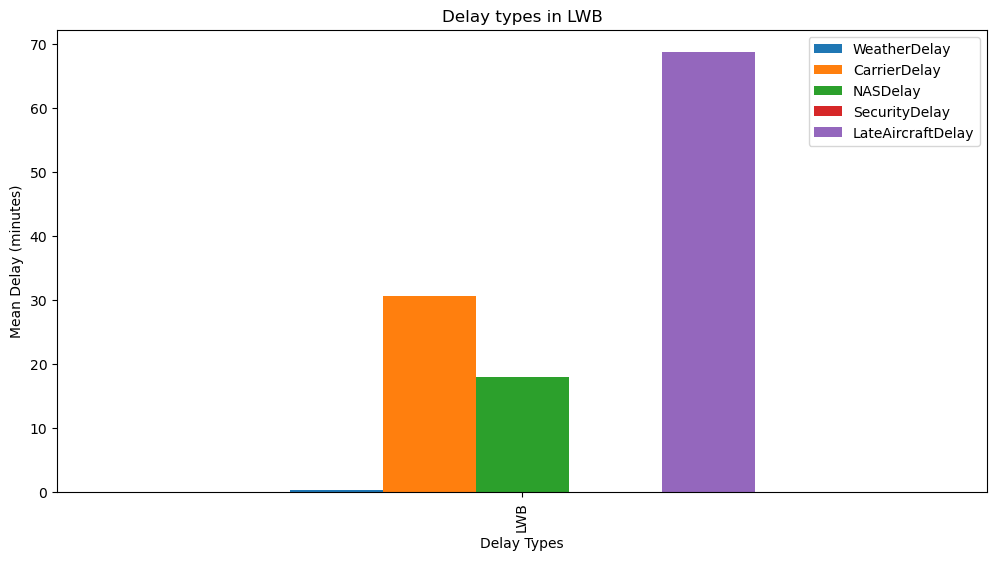

In [145]:
# Plotting the mean delays for LWB origin
LWB_departureDelays.plot(kind='bar',
                         figsize =(12, 6),
                         title = 'Delay types in LWB',
                         xlabel = 'Delay Types',
                         ylabel = 'Mean Delay (minutes)',
                         )
plt.savefig('LWBDelay.png', format="png", dpi = 300)

### Correlation with late arrivals

In [146]:
DepDelay_Mean = df['DepDelayMinutes'].mean()

In [147]:
ArrDelay_Mean = df['ArrDelayMinutes'].mean()

In [148]:
# following from earlier, having imported pandas as pd already
# read the data again, and select only 4 variables (columns) out of 23

depDelay_read = df[['DepDelayMinutes', 'ArrDelayMinutes']]

# calculate three different correlation coefficients
# put them in a list
coefficients = ['pearson']

#define an empty dictionary for output storage; can use a df as well. It's up to you.
depDelay_corr = {}

#iterate across three correlation methods
for coefficient in coefficients:
    depDelay_corr[coefficient] = depDelay_read.corr(method=coefficient).transpose()

In [149]:
depDelay_corr

{'pearson':                  DepDelayMinutes  ArrDelayMinutes
 DepDelayMinutes          1.00000          0.96745
 ArrDelayMinutes          0.96745          1.00000}

### Which route has the highest departure delay?

In [150]:
# Grouping the routes

RouteGroups = df.groupby(df.Route)

# Displaying route delays
pd.DataFrame(RouteGroups['DepDelayMinutes'].sum()).sort_values('DepDelayMinutes', ascending=False)

,DepDelayMinutes
Route,
ORD-->LGA,160122.0
LGA-->ORD,148931.0
LAX-->SFO,115279.0
LAX-->JFK,91461.0
SFO-->LAX,88795.0
...,...
LEX-->SAV,0.0
TPA-->MCO,0.0
PVD-->MSP,0.0


In [151]:
print('Therefore, the route with most number of LATE arrivals is: ' + pd.DataFrame(RouteGroups['DepDelayMinutes'].sum()).sort_values('DepDelayMinutes', ascending=False).index[0])

Therefore, the route with most number of LATE arrivals is: ORD-->LGA


In [152]:
origin_counts = df['Origin'].value_counts()

# Rank the counts in descending order
origin_ranking = origin_counts.rank(ascending=False, method='dense')

# Combine the counts and rankings into a DataFrame
origin_counts_df = pd.DataFrame({'Count': origin_counts, 'Rank': origin_ranking})

# Sort by rank
origin_counts_df.sort_values('Rank', inplace=True)

print('Ranking of origins by count:')
print(origin_counts_df)

Ranking of origins by count:
      Count   Rank
ATL  193828    1.0
ORD  164378    2.0
DFW  139392    3.0
DEN  117427    4.0
CLT  115773    5.0
..      ...    ...
IFP      45  328.0
BKG      43  329.0
EAR      43  329.0
AKN      35  330.0
YNG       2  331.0

[355 rows x 2 columns]


In [153]:
#Finding LGA

lga_count = origin_counts_df.loc['LGA', 'Count']
lga_rank = origin_counts_df.loc['LGA', 'Rank']

print('Count of flights from LGA:', lga_count)
print('Rank of LGA in origins by count:', lga_rank)

Count of flights from LGA: 85173
Rank of LGA in origins by count: 10.0


In [154]:
#Finding ORD

ord_count = origin_counts_df.loc['ORD', 'Count']
ord_rank = origin_counts_df.loc['ORD', 'Rank']

print('Count of flights from ORD:', ord_count)
print('Rank of LGA in origins by count:', ord_rank)

Count of flights from ORD: 164378
Rank of LGA in origins by count: 2.0


### Deep dive into ORD & WYS

In [157]:
ord_flights = df[df['Origin'] == 'ORD']
wys_flights = df[df['Origin'] == 'WYS']

# Calculate the total number of flights for ORD and WYS
total_ord_flights = len(ord_flights)
total_wys_flights = len(wys_flights)

# Calculate the count of each DepGroup for ORD & WYS flights as a percentage
dep_group_distribution_ord = (ord_flights['DepGroup'].value_counts() / total_ord_flights) * 100
dep_group_distribution_wys = (wys_flights['DepGroup'].value_counts() / total_wys_flights) * 100

# Get unique DepGroup categories for x-axis
dep_groups = np.unique(dep_group_distribution_ord.index.union(dep_group_distribution_wys.index))

# Get percentages for ORD and WYS flights for each DepGroup
percentages_ord = [dep_group_distribution_ord.get(dep_group, 0) for dep_group in dep_groups]
percentages_wys = [dep_group_distribution_wys.get(dep_group, 0) for dep_group in dep_groups]

# Create the comparison bar chart
plt.figure(figsize=(12, 6))
plt.bar(np.arange(len(dep_groups)), percentages_ord, width = bar_width, label = 'ORD', color = 'skyblue')
plt.bar(np.arange(len(dep_groups)) + bar_width, percentages_wys, width = bar_width, label = 'WYS', color = 'orange')

plt.xlabel('Departure Group')
plt.ylabel('Percentage')
plt.title('Departure Group Comparison for Flights Originating from ORD and WYS')
plt.xticks(np.arange(len(dep_groups)) + bar_width / 2, dep_groups)
plt.legend()

plt.savefig('ORDWYSGroup.png', format="png", dpi = 300)

NameError: name 'bar_width' is not defined

<Figure size 1200x600 with 0 Axes>

### Weather delay airport

In [158]:
#Finding Weather Delay by Airport

mean_WeatherdepartureDelays = pd.DataFrame(departure_airports['WeatherDelay'].mean()).sort_values('WeatherDelay', ascending=False) #Sorting from largest to smallest
mean_WeatherdepartureDelays

,WeatherDelay
Origin,
OWB,11.981818
CMX,6.154696
ABY,5.710891
RKS,4.774096
ADK,4.692308
...,...
PSE,0.000000
OGD,0.000000
FLO,0.000000


In [ ]:
print('Therefore, the airport with the highest weather delay is: ' + pd.DataFrame(departure_airports['WeatherDelay'].mean()).sort_values('WeatherDelay', ascending=False).index[0])

### NAS Delay by Airport

In [ ]:
#Finding NAS Delay by Airport

mean_NASdepartureDelays = pd.DataFrame(departure_airports['NASDelay'].mean()).sort_values('NASDelay', ascending=False) #Sorting from largest to smallest
mean_NASdepartureDelays

In [ ]:
print('Therefore, the airport with the highest NAS delay is: ' + pd.DataFrame(departure_airports['NASDelay'].mean()).sort_values('NASDelay', ascending=False).index[0])

### Security delay by airport

In [ ]:
#Finding Security Delay by Airport

mean_SecdepartureDelays = pd.DataFrame(departure_airports['SecurityDelay'].mean()).sort_values('SecurityDelay', ascending=False) #Sorting from largest to smallest
mean_SecdepartureDelays

In [ ]:
print('Therefore, the airport with the highest Security delay is: ' + pd.DataFrame(departure_airports['SecurityDelay'].mean()).sort_values('SecurityDelay', ascending=False).index[0])

### Carrier Delay

In [ ]:
#Finding Carrier Delay by Airport

mean_CarrierdepartureDelays = pd.DataFrame(departure_airports['CarrierDelay'].mean()).sort_values('CarrierDelay', ascending=False) #Sorting from largest to smallest
mean_CarrierdepartureDelays

In [ ]:
print('Therefore, the airport with the highest Carrier delay is: ' + pd.DataFrame(departure_airports['CarrierDelay'].mean()).sort_values('CarrierDelay', ascending=False).index[0])

### Late aircraft delay

In [ ]:
#Finding Late aircraft Delay by Airport

mean_LatedepartureDelays = pd.DataFrame(departure_airports['LateAircraftDelay'].mean()).sort_values('LateAircraftDelay', ascending=False) #Sorting from largest to smallest
mean_LatedepartureDelays

In [ ]:
print('Therefore, the airport with the highest late aircraft delay is: ' + pd.DataFrame(departure_airports['LateAircraftDelay'].mean()).sort_values('LateAircraftDelay', ascending=False).index[0])

### Arrival delay by taxi time

In [ ]:
# Finding total taxi time

TaxiTime = df['TaxiOut'] + df['TaxiIn']
df['TaxiTime'] = TaxiTime

In [ ]:
df['TaxiTime']

In [ ]:
df['TaxiTime'].mean()

Grouping the total taxi time into 4 groups, Short (15 minutes or below), Medium (Between 15 minutes and 30 minutes), Long (More than 30 minutes) & Cancelled (Cancelled flights)

In [ ]:
# Grouping Taxi Time

df['TaxiGroup'] = None
df.loc[
    (df['TaxiTime'] <= 15), 'TaxiGroup'
] = 'Short'
df.loc[
    (df['TaxiTime'] > 15) & (df['TaxiTime'] <= 30), 'TaxiGroup'
] = 'Medium'
df.loc[
    (df['TaxiTime'] > 30), 'TaxiGroup'
] = 'Long'
df.loc[df['CancellationCode'] == 'B', 'DepGroup'] = 'Cancelled'

In [ ]:
# Taxi group with Arrival delays

taxi_delayGroup = df.groupby(df.TaxiGroup)

taxi_delayGroup = pd.DataFrame(taxi_delayGroup['ArrDelayMinutes'].mean()).sort_values('ArrDelayMinutes', ascending=False) #Sorting from largest to smallest
taxi_delayGroup

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
taxi_delayGroup.plot(kind = 'bar',
                     xlabel = 'Taxi Group',
                     ylabel = 'Mean Arrival Delay (minutes)',
                     title = 'Mean Arrival Delay by Taxi Group')
plt.tight_layout()
plt.savefig('TaxiArrDelay.png', format="png", dpi = 300)

# Seasonality

### How many flights per Month?

In [ ]:
# Finding number of scheduled flights per month

df['Month'].value_counts().sort_index().plot(
    kind = 'bar', 
    figsize = (10, 5), 
    title = 'Scheduled Flights Per Month', 
    xlabel = 'Month number', 
    ylabel = 'Number of scheduled flights'
)
plt.savefig('FlightMonth.png', format="png", dpi = 300)

### Results by Month

In [ ]:
# Finding % departure delay for each month

plt.figure(figsize = (10, 6))
sns.heatmap(df_agg[col_order], cmap = 'Greens', annot = True, fmt = '.2f', cbar = True)
plt.xlabel('Delay Group', fontsize = 14, weight = 'bold')
plt.ylabel('Month', fontsize = 14, weight = 'bold')
plt.title('Percentage Departure Delay by Month', fontsize = 16, weight = 'bold')
plt.savefig('%DepDelaybyMonthHeatMap.png', format = "png", dpi = 300)

### Weather delay by Season

In [ ]:
# Filter the DataFrame for 'WeatherDelay' > 0
filtered_weather_delay_winter = df_winter2018[df_winter2018['WeatherDelay'] > 0]

# Calculate the mean of 'WeatherDelay'
weather_winter_delay_mean = filtered_weather_delay_winter['WeatherDelay'].mean()

In [ ]:
# Filter the DataFrame for 'WeatherDelay' > 0
filtered_weather_delay_summer = df_summer2018[df_summer2018['WeatherDelay'] > 0]

# Calculate the mean of 'WeatherDelay'
weather_summer_delay_mean = filtered_weather_delay_summer['WeatherDelay'].mean()

In [ ]:
weather_season = pd.Series([weather_winter_delay_mean, weather_summer_delay_mean], ['Winter', 'Summer'])

In [ ]:
weather_season

In [ ]:
weather_season.plot(kind = 'bar',
                    title = 'Weather delay by Season',
                    xlabel = 'Season',
                    ylabel = 'Average Delay')
plt.tight_layout()
plt.savefig('WeatherDelay.png', format="png", dpi = 300)

### Average Taxi time by season

In [ ]:
# Adding winter taxi time

TaxiTime = df_winter2018['TaxiOut'] + df_winter2018['TaxiIn']
df_winter2018['TaxiTime'] = TaxiTime

In [ ]:
# Adding summer taxi time

TaxiTime = df_summer2018['TaxiOut'] + df_summer2018['TaxiIn']
df_summer2018['TaxiTime'] = TaxiTime

In [ ]:
winter_taxiMean = df_winter2018['TaxiTime'].mean()
summer_taxiMean = df_summer2018['TaxiTime'].mean()

In [ ]:
taxi_seasonTime = pd.Series([winter_taxiMean, summer_taxiMean], ['Winter', 'Summer'])

In [ ]:
taxi_seasonTime.plot(kind = 'bar', 
                     title = 'Taxi delay by Season', 
                     xlabel = 'Season', 
                     ylabel = 'Average Taxi Delay (minutes)')

plt.tight_layout()
plt.savefig('TaxiSeason.png', format="png", dpi = 300)